<a href="https://colab.research.google.com/github/JulianSilva2001/Neural-Network/blob/main/LeNet_5_network_for_MNIST_using_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#LeNet-5 network for MNIST using Pytorch

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:01<00:00, 5.23MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 152kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:01<00:00, 1.45MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 4.53MB/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Epoch [1/10], Loss: 0.2624, Training Accuracy: 91.79%
Test Accuracy: 97.31%
Epoch [2/10], Loss: 0.0803, Training Accuracy: 97.54%
Test Accuracy: 98.04%
Epoch [3/10], Loss: 0.0573, Training Accuracy: 98.20%
Test Accuracy: 98.72%
Epoch [4/10], Loss: 0.0446, Training Accuracy: 98.62%
Test Accuracy: 98.68%
Epoch [5/10], Loss: 0.0377, Training Accuracy: 98.81%
Test Accuracy: 98.62%
Epoch [6/10], Loss: 0.0314, Training Accuracy: 99.03%
Test Accuracy: 98.96%
Epoch [7/10], Loss: 0.0257, Training Accuracy: 99.19%
Test Accuracy: 99.04%
Epoch [8/10], Loss: 0.0239, Training Accuracy: 99.22%
Test Accuracy: 99.11%
Epoch [9/10], Loss: 0.0195, Training Accuracy: 99.38%
Test Accuracy: 98.96%
Epoch [10/10], Loss: 0.0174, Training Accuracy: 99.44%
Test Accuracy: 98.74%


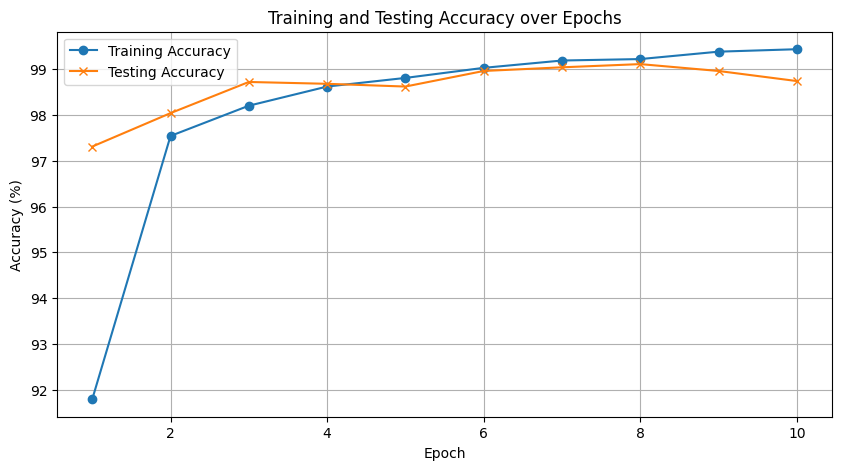

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Data Loading and Transformation
transform = transforms.Compose([
    transforms.Resize((32, 32)),  # Resize to 32x32 as LeNet-5 expects this input size
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

batch_size = 64

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

train_accuracies = []
test_accuracies = []


# Define LeNet-5 Architecture
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=1)  # 1 input channel, 6 output channels
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # Corrected to 576 inputs instead of 400
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        self.pool = nn.AvgPool2d(kernel_size=2, stride=2)

    def forward(self, x):
        x = torch.relu(self.conv1(x))  # Layer 1: Conv -> ReLU -> Pool
        x = self.pool(x)
        x = torch.relu(self.conv2(x))  # Layer 2: Conv -> ReLU -> Pool
        x = self.pool(x)
        x = x.view(-1, 16 * 5 * 5)  # Flatten with correct dimension
        x = torch.relu(self.fc1(x))  # Layer 3: Fully Connected -> ReLU
        x = torch.relu(self.fc2(x))  # Layer 4: Fully Connected -> ReLU
        x = self.fc3(x)  # Layer 5: Fully Connected
        return x

# Model, Loss Function, and Optimizer
model = LeNet5()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training Loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for inputs, labels in trainloader:
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

        running_loss += loss.item()

    train_accuracy = 100 * correct_train / total_train
    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {running_loss / len(trainloader):.4f}, Training Accuracy: {train_accuracy:.2f}%")
    train_accuracies.append(train_accuracy)


    # Testing Loop
    model.eval()
    correct_test = 0
    total_test = 0
    with torch.no_grad():
        for inputs, labels in testloader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()

    test_accuracy = 100 * correct_test / total_test
    print(f"Test Accuracy: {test_accuracy:.2f}%")
    test_accuracies.append(test_accuracy)

epochs = range(1, num_epochs + 1)

plt.figure(figsize=(10, 5))
plt.plot(epochs, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(epochs, test_accuracies, label='Testing Accuracy', marker='x')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training and Testing Accuracy over Epochs')
plt.legend()
plt.grid()
plt.show()

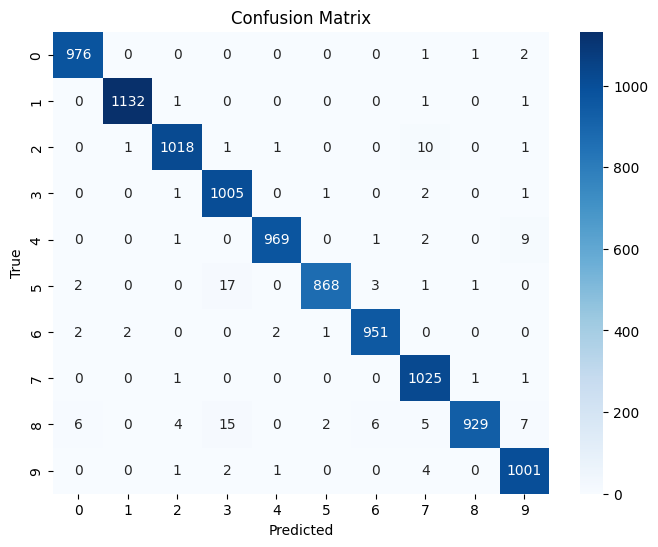

In [2]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Make predictions and collect true labels for the test set
all_preds = []
all_labels = []

# Set the model to evaluation mode
model.eval()

with torch.no_grad():
    for inputs, labels in testloader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Compute the confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


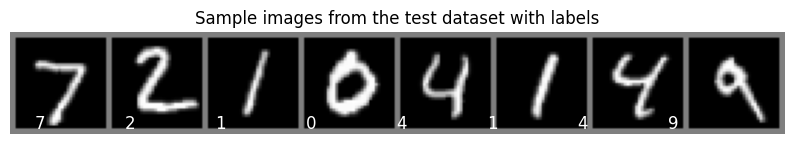

In [6]:
# Get a batch of test data
dataiter = iter(testloader)
images, labels = next(dataiter)

# Show images and print labels
plt.figure(figsize=(10, 4))
img_grid = torchvision.utils.make_grid(images[:8], nrow=8)

# Unnormalize the image grid
img_grid = img_grid / 2 + 0.5
npimg = img_grid.numpy()

# Display the image grid
plt.imshow(np.transpose(npimg, (1, 2, 0)))
plt.axis('off')

# Display the labels on top of the images
for i in range(8):
    plt.text(
        (i % 8) * 32 + 10,  # X position (adjust 32 for spacing)
        32,  # Y position (adjust for vertical positioning)
        f'{labels[i].item()}',  # The label value
        color='white',  # Text color
        fontsize=12,  # Text size
        ha='center',  # Align text horizontally to center
        va='center'   # Align text vertically to center
    )

plt.title('Sample images from the test dataset with labels')
plt.show()
